<a href="https://colab.research.google.com/github/GetnetN/my-projects/blob/main/Proposed_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras,os
import keras.backend as k
import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.python.framework.ops import Tensor
from keras.models import Sequential
#from keras.layers.normalization import BatchNormalization
from keras import optimizers
import numpy as np
import keras.backend as k
import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.python.framework.ops import Tensor
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import layers
import cv2
import shutil
import random
import matplotlib.image as mpimg
import glob
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from collections import Counter
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from keras import Model, layers
from keras.models import Sequential
#from keras.optimizers import Adam, SGD
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, Input, Conv2D, MaxPooling2D, Flatten,MaxPooling3D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img
from keras import backend as K
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_height=224
img_width=224
batch_size=32

In [ ]:
=============================================== Load and Test Models ==================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

In [ ]:
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data_three'
test_datagen = ImageDataGenerator(rescale=1./255) # set validation split

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32)

Found 1848 images belonging to 8 classes.


In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
SKDCNET_pred = []
for folder in os.listdir(test_data_dir):

    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))

    for image_id in test_image_ids[:int(len(test_image_ids))]:

        path = os.path.join(test_data_dir,folder,image_id)

        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255

        model_one_prediction = np.argmax(SKDCNET.predict(np.array([img_normalized])))
        SKDCNET_pred.append(model_one_prediction)


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):

    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('SKDCNET Model Accuracy', model_accuracy)

    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))

In [ ]:
=================================================SKDCNET result ======================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

SKDCNET Model Accuracy 0.9707792207792207
                   precision    recall  f1-score   support

             Acne       0.99      0.98      0.98       231
Atopic Dermatitis       0.97      0.97      0.97       231
           Eczema       0.98      0.97      0.97       231
         Impetigo       0.99      0.97      0.98       231
        Psoriasis       0.93      0.97      0.95       231
          Scabies       0.94      0.97      0.96       231
   Tinea Corporis       0.97      0.97      0.97       231
      Tinea Pedis       0.99      0.98      0.98       231

         accuracy                           0.97      1848
        macro avg       0.97      0.97      0.97      1848
     weighted avg       0.97      0.97      0.97      1848



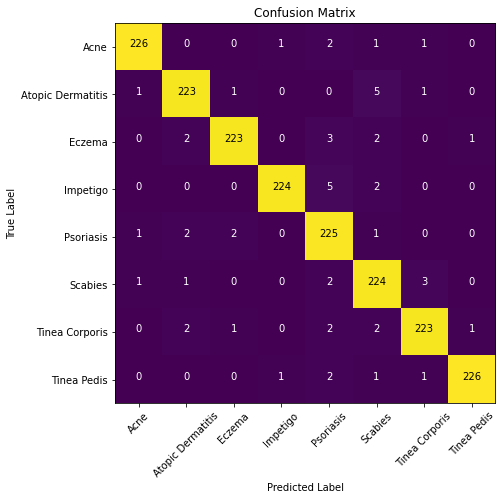

In [ ]:
clf_report(true_value, SKDCNET_pred)    #model one prediction

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
FVGG16_pred = []
for folder in os.listdir(test_data_dir):

    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))

    for image_id in test_image_ids[:int(len(test_image_ids))]:

        path = os.path.join(test_data_dir,folder,image_id)

        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255

        model_two_prediction = np.argmax(FVGG16.predict(np.array([img_normalized])))
        FVGG16_pred.append(model_two_prediction)


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):

    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('FVGG16 Model Accuracy', model_accuracy)

    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))

In [ ]:
=================================================FVGG16 result ======================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

FVGG16 Model Accuracy 0.9545454545454546
                   precision    recall  f1-score   support

             Acne       0.98      0.96      0.97       231
Atopic Dermatitis       0.95      0.97      0.96       231
           Eczema       0.93      0.93      0.93       231
         Impetigo       0.98      0.97      0.97       231
        Psoriasis       0.88      0.97      0.92       231
          Scabies       0.96      0.97      0.96       231
   Tinea Corporis       0.99      0.90      0.94       231
      Tinea Pedis       1.00      0.97      0.98       231

         accuracy                           0.95      1848
        macro avg       0.96      0.95      0.95      1848
     weighted avg       0.96      0.95      0.95      1848



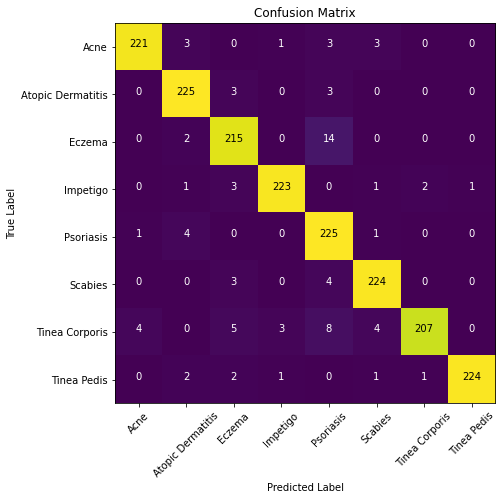

In [ ]:
clf_report(true_value, FVGG16_pred)    #model two prediction

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
InceptionV3_pred = []
for folder in os.listdir(test_data_dir):

    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))

    for image_id in test_image_ids[:int(len(test_image_ids))]:

        path = os.path.join(test_data_dir,folder,image_id)

        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255

        model_three_prediction = np.argmax(InceptionV3.predict(np.array([img_normalized])))
        InceptionV3_pred.append(model_three_prediction)


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):

    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('InceptionV3 Model Accuracy', model_accuracy)

    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))

In [ ]:
=================================================InceptionV3 result ======================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

InceptionV3 Model Accuracy 0.9724025974025974
                   precision    recall  f1-score   support

             Acne       1.00      0.97      0.98       231
Atopic Dermatitis       0.92      0.98      0.95       231
           Eczema       0.97      0.97      0.97       231
         Impetigo       1.00      0.98      0.99       231
        Psoriasis       0.98      0.96      0.97       231
          Scabies       0.95      0.97      0.96       231
   Tinea Corporis       0.98      0.96      0.97       231
      Tinea Pedis       0.97      0.99      0.98       231

         accuracy                           0.97      1848
        macro avg       0.97      0.97      0.97      1848
     weighted avg       0.97      0.97      0.97      1848



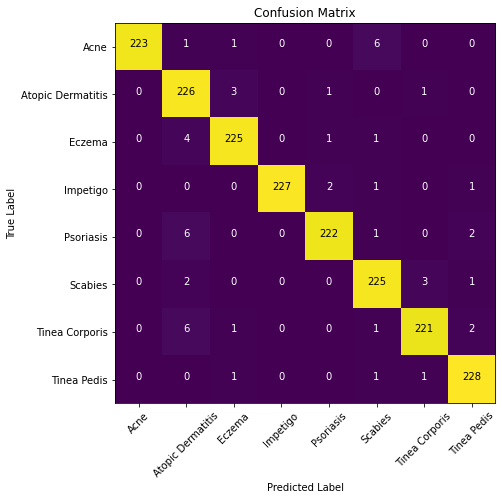

In [ ]:
clf_report(true_value, InceptionV3_pred)    #model three prediction

In [ ]:
************ Proposed Model (ESKDCNET) accuracy **********************

In [ ]:
AlexNet=tf.keras.models.load_model('/content/drive/MyDrive/Compared Model/AlexNet')
pVGG16=tf.keras.models.load_model('/content/drive/MyDrive/Compared Model/pVGG16')



******* Proposed Model (ESKDCNET) accuracy **********************  




In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
SKDCNET_pred = []
FVGG16_pred = []
InceptionV3_pred = []
AlexNet_pred=[]
pVGG_pred=[]
ensemble_pred = []
for folder in os.listdir(test_data_dir):

    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))

    for image_id in test_image_ids[:int(len(test_image_ids))]:

        path = os.path.join(test_data_dir,folder,image_id)

        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        model_alex_prediction = np.argmax(AlexNet.predict(np.array([img_normalized])))
        AlexNet_pred.append(model_alex_prediction)
        model_PVGG16_prediction = np.argmax(pVGG16.predict(np.array([img_normalized])))
        pVGG_pred.append(model_PVGG16_prediction)

        model_one_prediction = np.argmax(SKDCNET.predict(np.array([img_normalized])))
        SKDCNET_pred.append(model_one_prediction)

        model_two_prediction = np.argmax(FVGG16.predict(np.array([img_normalized])))
        FVGG16_pred.append(model_two_prediction)

        model_three_prediction = np.argmax(InceptionV3.predict(np.array([img_normalized])))
        InceptionV3_pred.append(model_three_prediction)

        ensemble_model_prediction= mode([model_one_prediction, model_two_prediction, model_three_prediction,model_PVGG16_prediction, model_alex_prediction])
        ensemble_pred.append(ensemble_model_prediction)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):

    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Proposed (ESKDCNET) Model Accuracy', model_accuracy)

    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))

In [ ]:
================================================Proposed (ESKDCNET) model test result =================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

Proposed (ESKDCNET) Model Accuracy 0.9761904761904762
                   precision    recall  f1-score   support

             Acne       1.00      0.96      0.98       231
Atopic Dermatitis       0.97      0.97      0.97       231
           Eczema       0.97      0.98      0.97       231
         Impetigo       1.00      0.97      0.99       231
        Psoriasis       0.98      0.97      0.97       231
          Scabies       0.92      0.99      0.95       231
   Tinea Corporis       0.99      0.97      0.98       231
      Tinea Pedis       1.00      0.99      0.99       231

         accuracy                           0.98      1848
        macro avg       0.98      0.98      0.98      1848
     weighted avg       0.98      0.98      0.98      1848



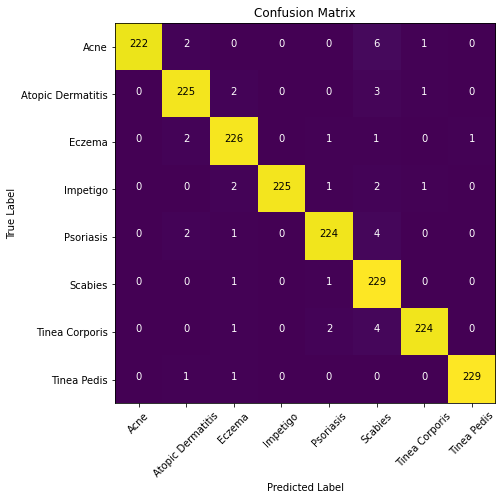

In [ ]:
ensemble_pred = [ c[0] for c in ensemble_pred]
clf_report(true_value, ensemble_pred)        #ensemble model one, two and three

In [ ]:
**************** Compare with state-art-models **************

In [ ]:
AlexNet=tf.keras.models.load_model('/content/drive/MyDrive/Compared Model/AlexNet')
pVGG16=tf.keras.models.load_model('/content/drive/MyDrive/Compared Model/pVGG16')

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
AlexNet_pred = []
for folder in os.listdir(test_data_dir):

    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))

    for image_id in test_image_ids[:int(len(test_image_ids))]:

        path = os.path.join(test_data_dir,folder,image_id)

        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255

        model_three_prediction = np.argmax(AlexNet.predict(np.array([img_normalized])))
        AlexNet_pred.append(model_three_prediction)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):

    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('AlexNet Model Accuracy', model_accuracy)

    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))


In [ ]:
================================================ AlexNet model testing Result =========================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

AlexNet Model Accuracy 0.9264069264069265
                   precision    recall  f1-score   support

             Acne       1.00      0.87      0.93       231
Atopic Dermatitis       0.95      0.90      0.93       231
           Eczema       0.92      0.91      0.92       231
         Impetigo       0.96      0.95      0.95       231
        Psoriasis       0.92      0.95      0.94       231
          Scabies       0.92      0.91      0.92       231
   Tinea Corporis       0.86      0.96      0.91       231
      Tinea Pedis       0.91      0.95      0.93       231

         accuracy                           0.93      1848
        macro avg       0.93      0.93      0.93      1848
     weighted avg       0.93      0.93      0.93      1848



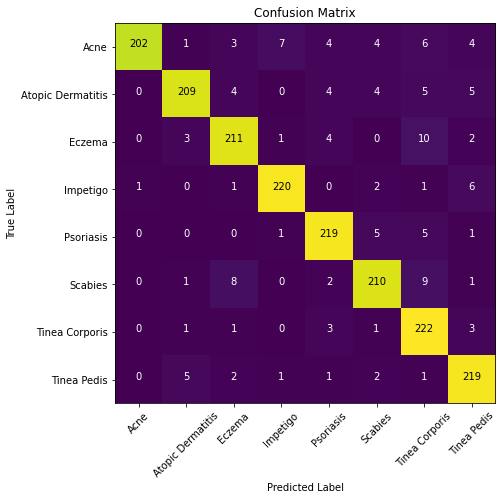

In [ ]:
clf_report(true_value, AlexNet_pred)

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
pVGG16_pred = []
for folder in os.listdir(test_data_dir):

    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))

    for image_id in test_image_ids[:int(len(test_image_ids))]:

        path = os.path.join(test_data_dir,folder,image_id)

        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255

        model_three_prediction = np.argmax(pVGG16.predict(np.array([img_normalized])))
        pVGG16_pred.append(model_three_prediction)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):

    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('pVGG16 Model Accuracy', model_accuracy)

    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))


In [ ]:
================================================ PVGG16 model testing Result =========================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

pVGG16 Model Accuracy 0.8852813852813853
                   precision    recall  f1-score   support

             Acne       0.87      0.96      0.91       231
Atopic Dermatitis       0.91      0.92      0.91       231
           Eczema       0.89      0.97      0.93       231
         Impetigo       1.00      0.90      0.95       231
        Psoriasis       0.98      0.56      0.71       231
          Scabies       0.71      0.95      0.81       231
   Tinea Corporis       0.86      0.97      0.91       231
      Tinea Pedis       0.99      0.86      0.92       231

         accuracy                           0.89      1848
        macro avg       0.90      0.89      0.88      1848
     weighted avg       0.90      0.89      0.88      1848



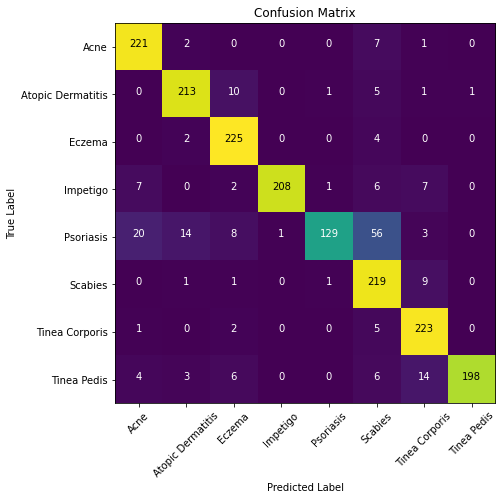

In [ ]:
clf_report(true_value, pVGG16_pred)

In [ ]:
===========================commented====================================

In [ ]:
train_data_dir='/content/drive/MyDrive/SKD/Equalized/GAUSIAN_BLURED_AUGMENTED'
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)# set validation split

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                    subset='training')
validation_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   subset='validation')

Found 3496 images belonging to 8 classes.
Found 872 images belonging to 8 classes.
